## Интегрирование

### Собственные интегралы


Цыбулин Иван ([tsybulin@crec.mipt.ru](mailto:tsybulin@crec.mipt.ru))

## Задача численного интегрирования

Требуется вычислить определенный интеграл
$$
\int_a^b f(x) dx
$$
Интеграл предполагается собственным, то есть $a, b \neq \infty$, $|f(x)| < \infty$.

### Приближение подынтегральной функции

Для вычисления интеграла, подынтегральную функцию приближают интегрируемой аналитически. Самый простой вариант &mdash; приблизить функцию интерполяционным многочленом:
$$
\int_a^b f(x) dx \approx \int_a^b P(x) dx
$$

Формулы численного интегрирования называются также *квадратурными формулами* или *квадратурами*.

### Формулы для равномерной сетки

Будем приближать функцию на отрезке $[a,b]$ интерполяционным многочленом на равномерной сетке:
* $P_0(x) = f(a)$. Получится формула прямоугольников:
$
\displaystyle \int_a^b f(x) dx \approx (b-a) f(a)
$
* $P_1(x) = f(a) + f(a, b) (x-a)$. Получится формула трапеций:
$
\displaystyle \int_a^b f(x) dx \approx (b-a) \frac{f(a) + f(b)}{2}
$

### Общий случай

Интерполянт в форме Лагранжа $P_p(x) = \sum_{k=0}^p f(x_k) \ell_k(x)$
$$
\int_a^b f(x) dx \approx \int_a^b P_p(x) dx = \sum_{k=0}^p f(x_k) \int_a^b \ell_k(x) dx = \\
= (b-a) \sum_{k=0}^p w_k f(x_k), 
\quad w_k = \frac{1}{2}\int_{-1}^1 \tilde\ell_k(t) dt
$$
Здесь $\tilde \ell_k$ построены уже на отрезке $[-1, 1]$.

### Формула Симпсона

Для случая $p = 2$ получаем формулу Симпсона
$$
\int_a^b f(x) dx = (b-a) \left[f(a) w_0 + f\left(\frac{a+b}{2}\right) w_1 + f(b) w_0\right],\\
w_0 = \frac{1}{2}\int_{-1}^1 \frac{x(x-1)}{2} dx = \frac{1}{6}\\
w_1 = \frac{1}{2}\int_{-1}^1 (1-x^2) dx = \frac{2}{3}\\
w_2 = \frac{1}{2}\int_{-1}^1 \frac{x(x+1)}{2} dx = \frac{1}{6}
$$

### Формулы Ньютона-Котеса

$p$ | Название | Формула | Остаточный член
-|-|-|-
$0$ | Прямоугольников | $(b-a) f(x_1)$ | $\frac{(b-a)^2}{2} f'(\xi)$
$1$ | Трапеций | $(b-a) \frac{f(x_1) + f(x_2)}{2}$ | $-\frac{(b-a)^3}{12} f''(\xi)$
$2$ | Симпсона | $(b-a) \frac{f(x_1) + 4f(x_2) + f(x_3))}{6}$ | $-\frac{(b-a)^5}{2880} f^{(4)}(\xi)$
$3$ | Формула 3/8 | $(b-a) \frac{f(x_1) + 3f(x_2) + 3f(x_3) + f(x_4)}{8}$ | $-\frac{(b-a)^5}{6480} f^{(4)}(\xi)$

Здесь $x_1, \dots, x_p$ &mdash; равномерная сетка на $[a,b]$.

### Составные формулы

Разобьем отрезок $[a,b]$ на равные интервалы длины $h = \frac{b-a}{n}$. Применим к каждому отдельному интервалу формулу прямоугольников
$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx h \sum_{i=1}^{n} f(x_{i-1}).
$$

Применив к каждому формулу трапеций, получаем
$$
\int_a^b f(x) dx = \sum_{i=1}^n \int_{x_{i-1}}^{x_i} f(x) dx \approx 
h \sum_{i=1}^{n} \frac{f(x_{i-1}) + f(x_i)}{2} =\\
= \frac{h}{2} \left(f(x_0) + 2f(x_1) + \dots + 2f(x_{n-1}) + f(x_n)\right)
$$

Объединив интервалы по два и применив к каждой паре формулу Сипсона, получаем
$$
\int_a^b f(x) dx = \sum_{i=1}^{n/2} \int_{x_{2i-2}}^{x_{2i}} f(x) dx \approx 
2h \sum_{i=1}^{n/2} \frac{f(x_{2i-2}) + 4 f(x_{2i-1}) + f(x_{2i})}{6} =\\
= \frac{h}{3} \left(f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + \dots + \\
\phantom{z}\qquad\qquad + 4f(x_{n-3}) + 2f(x_{n-2}) + 4f(x_{n-1}) + f(x_n)\right)
$$

### Погрешность составных формул
Пусть элементарная квадратурная формула на одном интервале имеет остаточный член вида
$$
R_1 = C (b-a)^{k+1} f^{(k)}(\xi).
$$
Тогда суммарная ошибка на всех интервалах
$$
R_\text{сост} = C h^{k+1} \sum_{i=1}^n f^{(k)}(\xi_i),\\
|R_\text{сост}| \leqslant C h^{k+1} \sum_{i=1}^n |f^{(k)}(\xi_i)| 
\leqslant C (b-a) h^k \max_{x \in [a,b]} |f^{(k)}(x)|
$$

Для формулы Симпсона требуется оценить ошибку немного иначе, так как она интегрирует пары интервалов:
$$
R = \frac{(2h)^5}{2880} \sum_{i=1}^{n/2} f^{(4)}(\xi_i),\\
|R| \leqslant 32 \frac{h^5}{2880} \sum_{i=1}^{n/2} |f^{(4)}(\xi_i)| 
\leqslant  \frac{(b-a) h^4}{180} \max_{x \in [a,b]} |f^{(4)}(x)|
$$

### Погрешности составных формул

$p$ | $n$ | Название | Погрешность
-|-|-|-
$0$ | $\forall$ | Прямоугольников | $\frac{(b-a) h}{2} M_1$
$1$ | $\forall$ | Трапеций | $\frac{(b-a) h^2}{12} M_2$
$2$ | $n = 2m$ | Симпсона | $\frac{(b-a) h^4}{180} M_4$
$3$ | $n = 3m$ | Формула 3/8 | $\frac{(b-a) h^4}{80} M_4$

### Точность квадратурных формул

Алгебраической степенью точности квадратурной формулы называют такое число $d$, что квадратурная формула точна для всех многочленов степени $d$, но для некоторых многочленов степени $d+1$ уже не точна. Из вида остаточного члена заключаем, что метод прямоугольников имеет $d=0$, метод трапеций &mdash; $d=1$, методы Симпсона и 3/8 &mdash; $d=3$.

Можно видеть, что порядок метода (степень $h$ в оценке ошибки) совпадает с $d+1$.

In [71]:
def rectangle(f, h):
    return h * sum(f[:-1])

def trapezoid(f, h):
    return 0.5 * h * (f[0] + 2 * sum(f[1:-1]) + f[-1])

def simpson(f, h):
    assert (len(f)-1) % 2 == 0
    return h/3. * (f[0] + 4 * sum(f[1:-1:2]) + \
                   2 * sum(f[2:-2:2]) + f[-1])

def threeeights(f, h):
    assert (len(f)-1) % 3 == 0
    return 3*h/8. * (f[0] + 3 * sum(f[1:-1:3]) + \
                3 * sum(f[2:-1:3]) + 2 * sum(f[3:-3:3]) + f[-1])

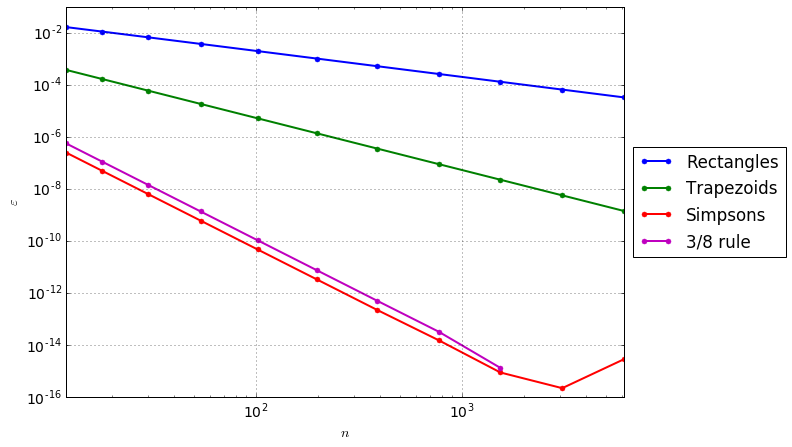

In [72]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', **{'size' : 14})

def f(x): return 4 / (1 + x*x)
exact = 4 * np.arctan(0.5)

ns = 6 + 3 * 2**np.arange(1, 12)
errs = []
for n in ns:
    x = np.linspace(0, 0.5, n+1)
    fv = f(x)
    I1 = rectangle(fv, x[1] - x[0])
    I2 = trapezoid(fv, x[1] - x[0])
    I3 = simpson(fv, x[1] - x[0])
    I4 = threeeights(fv, x[1] - x[0])
    errs.append([abs(I1-exact), abs(I2-exact), abs(I3-exact), abs(I4-exact)])

errs=np.array(errs)
    
plt.figure(figsize=(10, 7))
plt.loglog(ns, errs[:, 0], 'b.-', label='Rectangles', lw=2, ms=10)
plt.loglog(ns, errs[:, 1], 'g.-', label='Trapezoids', lw=2, ms=10)
plt.loglog(ns, errs[:, 2], 'r.-', label='Simpson''s', lw=2, ms=10)
plt.loglog(ns, errs[:, 3], 'm.-', label='3/8 rule', lw=2, ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.xlim(ns[0], ns[-1])
plt.grid()
plt.show()

### Формулы с произвольным расположением узлов

Расположим на отрезке $[a, b]$ узлы $\{x_i\}_{i=1}^m$ произвольно. Тогда проводя по этим узлам интерполяцию, получим
квадратурную формулу в том же виде
$$
\int_a^b f(x) dx \approx (b-a) \sum_{k=1}^m w_k f(x_k), \qquad w_k = \frac12 \int_{-1}^1 \tilde{\ell}_k(t) dt
$$
Очевидно, что такая формула точная для всех многочленов степени $m-1$, то есть алгебраическая точность такой формулы не ниже $m-1$. Как мы видели выше, это означает, что порядок формулы не ниже $m$.

### Формула средней точки
Рассмотрим случай $m=1$ (один узел). Располагая точку по центру
$$
\int_a^b f(x) dx \approx (b-a) f\left(\frac{a+b}{2}\right),
$$
получаем формулу первой степени точности (то есть второго порядка). Соответствующая составная формула имеет вид
$$
\int_a^b f(x) dx \approx h\sum_{i=1}^n f\left(\frac{x_{i-1} + x_i}{2}\right),
$$

### Уравнения для узлов и весов
Запишем условия точности формулы для многочленов $1, x, x^2, \dots, x^d$
$$
\sum_{k=0}^p w_k x_k^j = \int_a^b x^j dx, \qquad j = 0, 1, \dots, d
$$
Это система из $d+1$ нелинейного уравнения с $2m$ неизвестными $x_k, w_k$ &mdash; потенциально может иметь решение при $d = 2m-1$.

Оказывается, решение этой системы выражаются через корни ортогональных многочленов.

Узлы квадратуры $x_k$ должны быть выбраны в корнях многочлена $L_{p+1}(x)$. Многочлены $L_j(x)$ образуют ортогональное семейство
$$
\int_a^b L_i(x) L_j(x) dx = 0, \quad i \neq j, \qquad \deg L_j(x) = j, \; L_j(x) = x^j + \dots
$$
Веса могут быть найдены либо из линейной системы (после определения $x_k$ система становится линейной), либо по стандартной формуле
$w_k = \frac{1}{2}\int_{-1}^1 \tilde{\ell}_k(t) dt$

Более того, этот результат сохраняется и для интегралов вида
$$
\int_a^b f(x) \omega(x) dx, 
$$
где $\omega(x) \geqslant 0$ &mdash; известная весовая функция.

В этом случае необходимо узлы взять в корнях многочленов $H_j(x)$, ортогональных с этим весом:
$$
\int_a^b H_i(x) H_j(x) \omega(x) = 0, \; i \neq j, \quad \deg H_j(x) = j, H_j(x) = x^j + \dots
$$
Веса определяются по формуле $w_k = \int_a^b \ell_k(x) \omega(x) dx$.

### Гауссовы квадратуры
Эти квадратурные формулы называются Гауссовыми квадратурами. Для формул с весовой функцией $\omega(x)$ иногда используют название квадратуры Гаусса-Кристоффеля. Также формулы для конкретного веса $\omega(x)$ часто называют по семейству ортогональных многочленов (квадратура Гаусса-Лежандра, Гаусса-Чебышева, Гаусса-Эрмита и т.п.)

Общее свойство данных квадратур &mdash; они имееют алгебраический порядок точности $2m-1$ имея всего $m$ узлов на отрезке $[a,b]$. При этом порядок составной квадратурной формулы равен $2m$.

Построим квадратурную формулу для случая $\omega(x) \equiv 1$ для $m=2$ узлов на отрезке $[-1, 1]$. Для этого необходимо сначала построить соответствующее семейство многочленов вплоть до многочлена $L_2(x)$:
$$
L_0(x) \equiv 1\\
L_1(x) = x + \alpha\\
L_2(x) = x^2 + \beta x + \gamma
$$

Многочлен $L_1(x)$ должен быть ортогонален $L_0(x)$:
$$
0 = \int_{-1}^1 L_0(x) L_1(x) dx = \int_{-1}^1 (x + \alpha) dx = 2 \alpha \implies L_1(x) = x.
$$
Многочлен $L_2(x)$ должен быть ортогонален $L_0(x)$ и $L_1(x)$:
$$
0 = \int_{-1}^1 L_0(x) L_2(x) dx = \int_{-1}^1 (x^2 + \beta x + \gamma) dx = \frac{2}{3} + 2 \gamma\\
0 = \int_{-1}^1 L_1(x) L_2(x) dx = \int_{-1}^1 x(x^2 + \beta x + \gamma) dx = \frac{2}{3}\beta\\\
L_2(x) = x^2 - \frac{1}{3}
$$

Корни многочлена $L_2(x) = x^2 - \frac{1}{3} = 0$ равны $x_{1,2} = \pm \frac{1}{\sqrt{3}}$. Эти корни будут узлами квадратуры.

$$
w_1 = \frac{1}{2}\int_{-1}^1 \frac{x_2 - x}{x_2 - x_1} dx = \frac{2x_2}{x_2 - x_1} = 1\\
w_2 = \frac{1}{2}\int_{-1}^1 \frac{x - x_1}{x_2 - x_1} dx = \frac{2x_1}{x_1 - x_2} = 1.
$$
Полученная квадратура имеет вид
$$
\int_{-1}^1 f(x) dx = f\left(-\frac{1}{\sqrt{3}}\right) + f\left(\frac{1}{\sqrt{3}}\right)
$$

In [73]:
# Интегрировать f(x) на отрезке [a,b] используя n вычислений f(x)
def gauss2(f, a, b, n):
    assert n % 2 == 0
    h = (b - a) / n
    s = 0
    for i in range(n // 2):
        x1 = (2*i+1) * h - h / np.sqrt(3)
        x2 = (2*i+1) * h + h / np.sqrt(3)
        s += h * (f(x1) + f(x2))
    return s

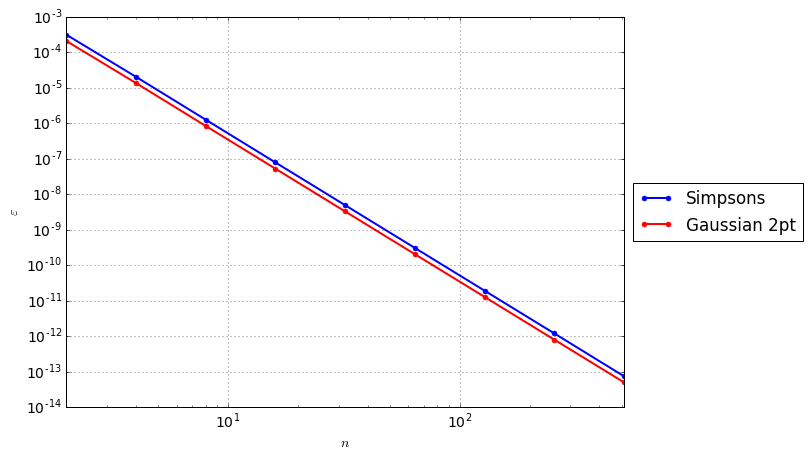

In [74]:
def f(x): return 4 / (1 + x*x)
exact = 4 * np.arctan(0.5)

ns = 2**np.arange(1, 10)
errs = []
for n in ns:
    fv = f(np.linspace(0, 0.5, n+1))
    Is = simpson(fv, 0.5/n)
    Ig = gauss2(f, 0, 0.5, n)
    errs.append([abs(Is-exact), abs(Ig-exact)])

errs=np.array(errs)
    
plt.figure(figsize=(10, 7))
plt.loglog(ns, errs[:, 0], 'b.-', label='Simpson''s', lw=2, ms=10)
plt.loglog(ns, errs[:, 1], 'r.-', label='Gaussian 2pt', lw=2, ms=10)
plt.legend(loc='center left', bbox_to_anchor=(1, .5))
plt.xlabel('$n$')
plt.ylabel('$\\varepsilon$')
plt.xlim(ns[0], ns[-1])
plt.grid()
plt.show()

### Практическая оценка погрешности
Не всегда на практике удается воспользоваться априорной оценкой вида
$$
\varepsilon \leqslant C M_p h^p,
$$
так как не всегда удается оценить $M_p$ для подынтегральной функции. В этом случае, обычно, пользуются правилом Рунге для определения подходящего шага $h$.

### Правило Рунге
Предположим, что нам известен порядок метода, которым мы хотим найти значение интеграла с заданной точностью $\varepsilon$. Тогда результат, вычисленный этим методом с шагом $h$ будет иметь вид
$$
I_h = I^* + \underbrace{C_1 h^p + C_2 h^{p+1} + \dots}_\text{ошибка интегрирования}.
$$
Здесь $I^*$ &mdash; точное значение интеграла. Для достаточно малых $h$ можно записать
$$
I_h = I^* + C_h h^p,
$$
где $C_h$ &mdash; почти константа, то есть слабо зависит от $h$.

Вычислим интеграл с шагом $h$ и с шагом $h/2$:
$$
I_h = I^* + C_1 h^p + C_2 h^{p+1} + \dots\\
I_{h/2} = I^* + C_1 \left(\frac{h}{2}\right)^p + C_2 \left(\frac{h}{2}\right)^{p+1} + \dots
$$
Тогда
$$
I_h - I_{h/2} = C_h h^p - C_{h/2} \left(\frac{h}{2}\right)^p \approx (2^p - 1) C_{h/2} \left(\frac{h}{2}\right)^p = (2^p - 1) (I_{h/2} - I^*)\\
\frac{2^p I_{h/2} - I_h}{2^p - 1} = I^* + O(h^{p+1})
$$

Таким образом, погрешность интегрирования на сетке $h/2$ может быть оценена как
$$
I_{h/2} - I^* \approx \frac{I_h - I_{h/2}}{2^p - 1}.
$$
Величина $$
\frac{2^p I_{h/2} - I_h}{2^p -1} = I_{h/2} - \frac{I_h - I_{h/2}}{2^p - 1},
$$
называется экстраполяцией результата по Ричардсону и характеризуется тем, что приближает ответ $I^*$ с большим порядком $O(h^{p+1})$, чем исходный метод $O(h^p)$

### Использование правила Рунге
Алгоритм применения правила Ругне следующий:
1. Задать небольшое число интевалов, скажем $n = 10$
2. Вычислить $I_h, I_{h/2}$ и оценить ошибку
$$
\Delta_{h/2} = \frac{I_h - I_{h/2}}{2^p - 1}.
$$
3. Если $|\Delta_{h/2}| < \varepsilon$, прекратить вычисления. Иначе измельчить сетку вдвое $h := h/2$ и перейти к шагу 2.
4. Ответом служит либо $I_{h/2}$, либо экстраполированное по Ричардсону значение $I_{h/2} - \Delta_{h/2}$.

In [75]:
def runge(f, a, b, eps=1e-12, richardson=False):
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    while True:
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), (b-a) / (2*n))
        Dh_2 = (Ih - Ih_2) / (2**4 - 1) # p = 4 для Симпсона
        print('I(h) = %.16f, err(h) = %.6e' % (Ih_2, Dh_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2
        if n > 10000: print('Too large n'); break
    return Ih_2 - Dh_2 if richardson else Ih_2

In [76]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge(f, a, b) - exact

I(h) = 0.4636479223346336, err(h) = 3.157185e-07
I(h) = 0.4636476285453064, err(h) = 1.958596e-08
I(h) = 0.4636476102217171, err(h) = 1.221573e-09
I(h) = 0.4636476090771032, err(h) = 7.630759e-11
I(h) = 0.4636476090055746, err(h) = 4.768578e-12
I(h) = 0.4636476090011042, err(h) = 2.980246e-13


2.9809488211185453e-13

### Возможные проблемы
Правилом Рунге и экстраполяцией Ричардсона можно пользоваться лишь в том случае, когда вы можете гарантировать, что используемый численный метод интегрирования действительно имеет порядок $p$.

In [77]:
def f(x): return np.sqrt(x)
a = 0; b = 4; exact = 2 / 3 * b**1.5

runge(f, a, b, eps=1e-4) - exact

I(h) = 5.3046342406801887, err(h) = -3.494941e-03
I(h) = 5.3231855090252225, err(h) = -1.236751e-03
I(h) = 5.3297454619694369, err(h) = -4.373302e-04
I(h) = 5.3320648246268956, err(h) = -1.546242e-04
I(h) = 5.3328848474901243, err(h) = -5.466819e-05


-0.00044848584320877904

### Дополнительные проверки
Для проверки корректности использования правила Рунге достаточно проверять условия
* что метод фактически сходится с порядком $p$,
$$
\frac{\Delta_{h}}{\Delta_{h/2}} \approx 2^p
$$
* что константа $C_h$ слабо зависит от $h$:
$$
C_h = \frac{\Delta_h}{h^p} \to C = \mathrm{const}
$$

In [78]:
def runge_checks(f, a, b, eps=1e-12, richardson=False):
    n = 4
    Ih = simpson(f(np.linspace(a, b, n+1)), (b-a) / n)
    Dh = None;
    while True:
        h_2 = (b-a) / (2*n)
        Ih_2 = simpson(f(np.linspace(a, b, 2*n+1)), h_2)
        Dh_2 = (Ih - Ih_2) / (2**4 - 1) # p = 4 для Симпсона
        Ch_2 = Dh_2 / h_2**4; ps = np.log2(Dh / Dh_2) if Dh != None else np.nan
        print('I(h) = %.16f, err(h) = %.6e, p* = %4.2f, C = %.6e' % \
              (Ih_2, Dh_2, ps, Ch_2))
        if abs(Dh_2) < eps:
            break
        n *= 2; Ih = Ih_2; Dh = Dh_2
        if n > 10000: print('Too large n'); break
    return Ih_2 - Dh_2 if richardson else Ih_2

In [79]:
def f(x): return 1 / (1 + x**2)
a = 0; b = 0.5; exact = np.arctan(b)

runge_checks(f, a, b) - exact

I(h) = 0.4636479223346336, err(h) = 3.157185e-07, p* =  nan, C = 2.069093e-02
I(h) = 0.4636476285453064, err(h) = 1.958596e-08, p* = 4.01, C = 2.053736e-02
I(h) = 0.4636476102217171, err(h) = 1.221573e-09, p* = 4.00, C = 2.049459e-02
I(h) = 0.4636476090771032, err(h) = 7.630759e-11, p* = 4.00, C = 2.048366e-02
I(h) = 0.4636476090055746, err(h) = 4.768578e-12, p* = 4.00, C = 2.048089e-02
I(h) = 0.4636476090011042, err(h) = 2.980246e-13, p* = 4.00, C = 2.048009e-02


2.9809488211185453e-13

In [80]:
def f(x): return np.sqrt(x)
a = 0; b = 4; exact = 2 / 3 * b**1.5

runge_checks(f, a, b, eps=1e-4) - exact

I(h) = 5.3046342406801887, err(h) = -3.494941e-03, p* =  nan, C = -5.591906e-02
I(h) = 5.3231855090252225, err(h) = -1.236751e-03, p* = 1.50, C = -3.166083e-01
I(h) = 5.3297454619694369, err(h) = -4.373302e-04, p* = 1.50, C = -1.791304e+00
I(h) = 5.3320648246268956, err(h) = -1.546242e-04, p* = 1.50, C = -1.013345e+01
I(h) = 5.3328848474901243, err(h) = -5.466819e-05, p* = 1.50, C = -5.732375e+01


-0.00044848584320877904

### Несобственные интегралы
Рассмотрим случай несобственного интеграла
$$
\int_a^b f(x) dx,
$$
у которого в точке $a$ функция обращается в бесконечность. При этом отрезок $[a,b]$ остается конечным, и других особых точек у $f(x)$ нет. Любой несобственный интеграл можно свести к такой постановке заменой переменных и разбиением отрезка на участки с одной особенностью.

### Регуляризация
Разобъем подынтегральную функцию $f(x)$, на часть $\varphi(x)$, содержащую особенность, и часть $R(x) = f(x) - \varphi(x)$, в которой особенности нет.
$$
\int_a^b f(x) dx = \int_a^b \varphi(x) dx + \int_a^b R(x) dx
$$
Выберем простую функцию $\varphi(x)$, так, чтобы первый интеграл вычислялся аналитически. Ко второму применим правило Рунге. Рассмотрим на примере
$$
\int_0^{\pi/2} \frac{\sqrt{x} dx}{\sin x} \approx 2.75314193394808172860366757084
$$

In [81]:
def f(x): return np.sqrt(x) / np.sin(x)
def R(x): return np.append([0], f(x[1:]) - x[1:]**(-0.5))
a = 0; b = np.pi / 2; exact = 2.75314193394808172860366757084 - np.sqrt(2*np.pi)

runge_checks(R, a, b, eps=1e-14) - exact

I(h) = 0.2465669562957238, err(h) = 2.423191e-05, p* =  nan, C = 1.630302e-02
I(h) = 0.2465215993654357, err(h) = 3.023795e-06, p* = 3.00, C = 3.255014e-02
I(h) = 0.2465149658115324, err(h) = 4.422369e-07, p* = 2.77, C = 7.616850e-02
I(h) = 0.2465138841057180, err(h) = 7.211372e-08, p* = 2.62, C = 1.987276e-01
I(h) = 0.2465136986662544, err(h) = 1.236263e-08, p* = 2.54, C = 5.450938e-01
I(h) = 0.2465136662487450, err(h) = 2.161167e-09, p* = 2.52, C = 1.524645e+00
I(h) = 0.2465136605409121, err(h) = 3.805222e-10, p* = 2.51, C = 4.295170e+00
I(h) = 0.2465136595333304, err(h) = 6.717212e-11, p* = 2.50, C = 1.213136e+01
I(h) = 0.2465136593553030, err(h) = 1.186850e-11, p* = 2.50, C = 3.429541e+01
I(h) = 0.2465136593238377, err(h) = 2.097687e-12, p* = 2.50, C = 9.698419e+01
I(h) = 0.2465136593182757, err(h) = 3.707997e-13, p* = 2.50, C = 2.742961e+02
I(h) = 0.2465136593172924, err(h) = 6.555127e-14, p* = 2.50, C = 7.758564e+02
Too large n


2.1083135237631723e-13

### Недостаточное выделение особенности
Хотя $R(x)$ теперь и не содержит особенности, она еще недостаточно регулярна для применения к ней метода Симпсона. Для него требуется, чтобы $R(x)$ имела ограниченную четвертую производную.

$$
\frac{\sqrt{x}}{\sin x} = \color{red}{\frac{1}{\sqrt{x}}+\frac{x^{3/2}}{6}+\frac{7 x^{7/2}}{360}}+\frac{31x^{11/2}}{15120}+O\left(x^{15/2}\right)
$$

Все слагаемые, отмеченные красным, имеют неограниченную вторую производную, и все они должны быть вынесены в $\varphi(x)$.

$$
\varphi(x) = \frac{1}{\sqrt{x}}+\frac{x^{3/2}}{6}+\frac{7 x^{7/2}}{360}, \quad
R(x) = \begin{cases}\frac{\sqrt{x}}{\sin x} - \varphi(x), &x > 0\\
0, & x = 0\end{cases}
$$

In [82]:
def f(x): return np.sqrt(x) / np.sin(x)
def phi(x): return x**(-0.5) + x**1.5/6. + (7*x**3.5)/360.
exphi = 2.7457604543273544586 # Вычисляется аналитически

def R(x): return np.append([0], f(x[1:]) - phi(x[1:]))
a = 0; b = np.pi / 2; exact = 2.75314193394808172860366757084 - exphi

runge_checks(R, a, b, eps=1e-14) - exact

I(h) = 0.0073926725777687, err(h) = 9.908375e-06, p* =  nan, C = 6.666270e-03
I(h) = 0.0073822021936242, err(h) = 6.980256e-07, p* = 3.83, C = 7.514010e-03
I(h) = 0.0073815251641254, err(h) = 4.513530e-08, p* = 3.95, C = 7.773860e-03
I(h) = 0.0073814824732734, err(h) = 2.846057e-09, p* = 3.99, C = 7.843031e-03
I(h) = 0.0073814797991069, err(h) = 1.782778e-10, p* = 4.00, C = 7.860634e-03
I(h) = 0.0073814796318775, err(h) = 1.114863e-11, p* = 4.00, C = 7.865056e-03
I(h) = 0.0073814796214242, err(h) = 6.968866e-13, p* = 4.00, C = 7.866155e-03
I(h) = 0.0073814796207708, err(h) = 4.355775e-14, p* = 4.00, C = 7.866576e-03
I(h) = 0.0073814796207300, err(h) = 2.721897e-15, p* = 4.00, C = 7.865240e-03


2.787700625894729e-15